### MATH 3375 Project 2 - Linear Regression Models

We will again look at the 2004 cars data set and build models to predict the retail price of the car. 

In [4]:
car_data <- read.csv("cars2004.csv", stringsAsFactors=TRUE)
head(car_data)

,Car,Body,WheelDrive,MSRP,Invoice,EngineSize,Cylinders,HP,City.MPG,Hwy.MPG,Weight,WheelBase,Length,Width
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,Chevrolet Aveo 4dr,Standard,Front,11690,10965,1.6,4,103,28,34,2370,98,167,66
2,Chevrolet Aveo LS 4dr hatch,Standard,Front,12585,11802,1.6,4,103,28,34,2348,98,153,66
3,Chevrolet Cavalier 2dr,Standard,Front,14610,13697,2.2,4,140,26,37,2617,104,183,69
4,Chevrolet Cavalier 4dr,Standard,Front,14810,13884,2.2,4,140,26,37,2676,104,183,68
5,Chevrolet Cavalier LS 2dr,Standard,Front,16385,15357,2.2,4,140,26,37,2617,104,183,69
6,Dodge Neon SE 4dr,Standard,Front,13670,12849,2.0,4,132,29,36,2581,105,174,67


#### Missing Data

Recall that the code below re-formats the last 2 columns to integers.  A warning is issued because those that are missing are now represented as NA, which means **Not Available**.

In [5]:
car_data$Length = as.integer(as.character(car_data$Length))
car_data$Width = as.integer(as.character(car_data$Width))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [6]:
tail(car_data)

,Car,Body,WheelDrive,MSRP,Invoice,EngineSize,Cylinders,HP,City.MPG,Hwy.MPG,Weight,WheelBase,Length,Width
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
402,Nissan Frontier King Cab XE V6,Pickup,All,19479,18253,3.3,6,180,17,20,3932,116,NA,NA
403,Nissan Titan King Cab XE,Pickup,All,26650,24926,5.6,8,305,14,18,5287,140,NA,NA
404,Subaru Baja,Pickup,All,24520,22304,2.5,4,165,21,28,3485,104,NA,NA
405,Toyota Tacoma,Pickup,Rear,12800,11879,2.4,4,142,22,27,2750,103,NA,NA
406,Toyota Tundra Regular Cab V6,Pickup,Rear,16495,14978,3.4,6,190,16,20,3925,128,NA,NA
407,Toyota Tundra Access Cab V6 SR5,Pickup,All,25935,23520,3.4,6,190,14,17,4435,128,NA,NA


### Tasks

##### 1. Create a correlation matrix to show the relationship between all QUANTITATIVE variables.


In [19]:
#Put solution to Exercise 1 in this cell. You may add additional cells if you like.

# select quantitative columns
quantitative_data <- car_data[, sapply(car_data, is.numeric)]

# compute the correlation matrix, 
correlation_matrix <- cor(quantitative_data, use = "pairwise.complete.obs")

# round
correlation_matrix <- round(correlation_matrix, 2)

correlation_matrix

,MSRP,Invoice,EngineSize,Cylinders,HP,City.MPG,Hwy.MPG,Weight,WheelBase,Length,Width
MSRP,1.00,1.00,0.56,0.64,0.83,-0.53,-0.45,0.44,0.14,0.20,0.31
Invoice,1.00,1.00,0.56,0.63,0.83,-0.53,-0.45,0.44,0.14,0.20,0.30
EngineSize,0.56,0.56,1.00,0.91,0.77,-0.80,-0.75,0.83,0.65,0.62,0.72
Cylinders,0.64,0.63,0.91,1.00,0.79,-0.74,-0.68,0.73,0.54,0.54,0.61
HP,0.83,0.83,0.77,0.79,1.00,-0.72,-0.65,0.63,0.38,0.37,0.49
City.MPG,-0.53,-0.53,-0.80,-0.74,-0.72,1.00,0.94,-0.83,-0.56,-0.50,-0.66
Hwy.MPG,-0.45,-0.45,-0.75,-0.68,-0.65,0.94,1.00,-0.83,-0.53,-0.38,-0.61
Weight,0.44,0.44,0.83,0.73,0.63,-0.83,-0.83,1.00,0.74,0.65,0.81
WheelBase,0.14,0.14,0.65,0.54,0.38,-0.56,-0.53,0.74,1.00,0.87,0.76
Length,0.20,0.20,0.62,0.54,0.37,-0.50,-0.38,0.65,0.87,1.00,0.75


##### 2. Based on the plots in your matrix above, select TWO quantitative features and create the following for EACH feature: 

* A simple linear regression model predicting retail price (MSRP) with the selected feature as the predictor. Show a model summary.
* A scatter plot with the feature as the independent variable, price as the dependent variable, **and the regression line** from your model.



Call:
lm(formula = MSRP ~ HP, data = car_data, na.action = na.omit)

Residuals:
   Min     1Q Median     3Q    Max 
-26983  -5768   -401   4209  98779 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17390.016   1771.884  -9.814   <2e-16 ***
HP             232.863      7.821  29.772   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10900 on 405 degrees of freedom
Multiple R-squared:  0.6864,	Adjusted R-squared:  0.6856 
F-statistic: 886.4 on 1 and 405 DF,  p-value: < 2.2e-16



Call:
lm(formula = MSRP ~ EngineSize, data = car_data, na.action = na.omit)

Residuals:
   Min     1Q Median     3Q    Max 
-31705  -8542  -3727   5772 155254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -846.8     2572.4  -0.329    0.742    
EngineSize   10571.7      767.4  13.776   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16060 on 405 degrees of freedom
Multiple R-squared:  0.3191,	Adjusted R-squared:  0.3174 
F-statistic: 189.8 on 1 and 405 DF,  p-value: < 2.2e-16


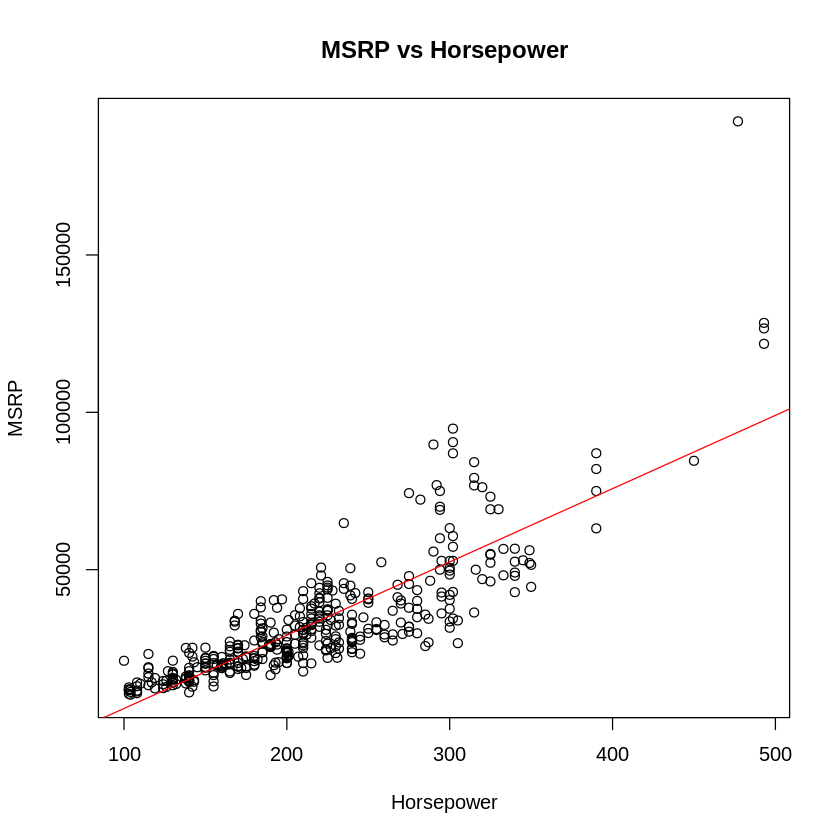

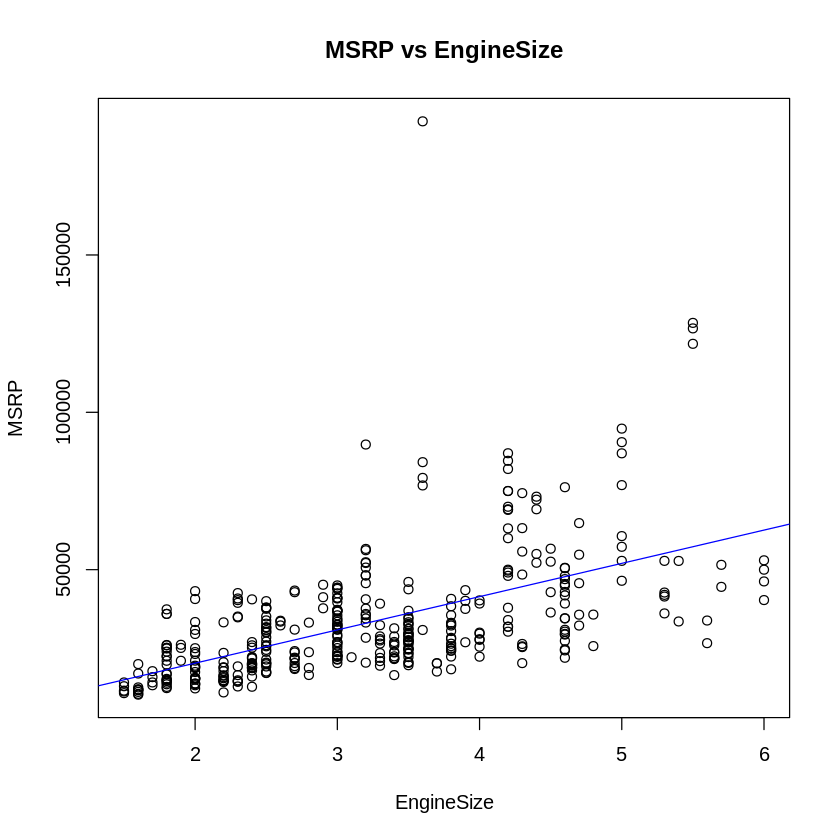

In [11]:
#Put solution to Exercise 2 in this cell. You may add additional cells if you like.

# MSRP v. Horsepower
model1 <- lm(MSRP ~ HP, data = car_data, na.action = na.omit)
summary(model1)

# scatter plot w/ regression line for HP
plot(car_data$HP, car_data$MSRP, main = "MSRP vs Horsepower", xlab = "Horsepower", ylab = "MSRP")
abline(model1, col = "red")

# MSRP v. EngineSize
model2 <- lm(MSRP ~ EngineSize, data = car_data, na.action = na.omit)
summary(model2)

# scatter plot w/ regression line for EngineSize
plot(car_data$EngineSize, car_data$MSRP, main = "MSRP vs EngineSize", xlab = "EngineSize", ylab = "MSRP")
abline(model2, col = "blue")

##### 2a. Answer the following questions based on your boxplots.

Put your answers in this cell. (Double-click the cell to edit.)

1. Were either of the quantitative features you selected significant predictors of price? Which one(s)?

**Both Horsepower and EngineSize are significant predictors of price (MSRP) based on the p-values from the linear regression models**

2. If you found significant predictors, at what **_significance level_** were they found to be significant?

**For Horsepower: the p-value is less than 2e-16, which is smaller than 0.001.**

**For EngineSize, the p-value is also less than 2e-16, indicating similar significance levels of less than 0.001.**

3. What proportion of variability in price was accounted for by **_each_** of your models?

**For the Horsepower model, we are given a multiple R-squared value of 0.6864. This means the model accounts for 68.64% of the variability in price.**

**For the EngineSize model, the multiple R-squared value is 0.3191. This indicates that the model accounts for 31.91% of variability in price.**

##### 3. Create the following plots and models

* A scatter plot with City.MPG as the predictor and MSRP as the response variable.
* A scatter plot with a log transformation, so that City.MPG is the predictor, and log(MSRP) is the response variable.
* A simple regression model with City.MPG as predictor and MSRP as the response. (Show model summary.)
* A simple regression model with City.MPG as predictor and the log transformed MSRP as the response. (Show model summary.)
* For EACH regression model, show the scatter plot again, with the regression line from the model you created.

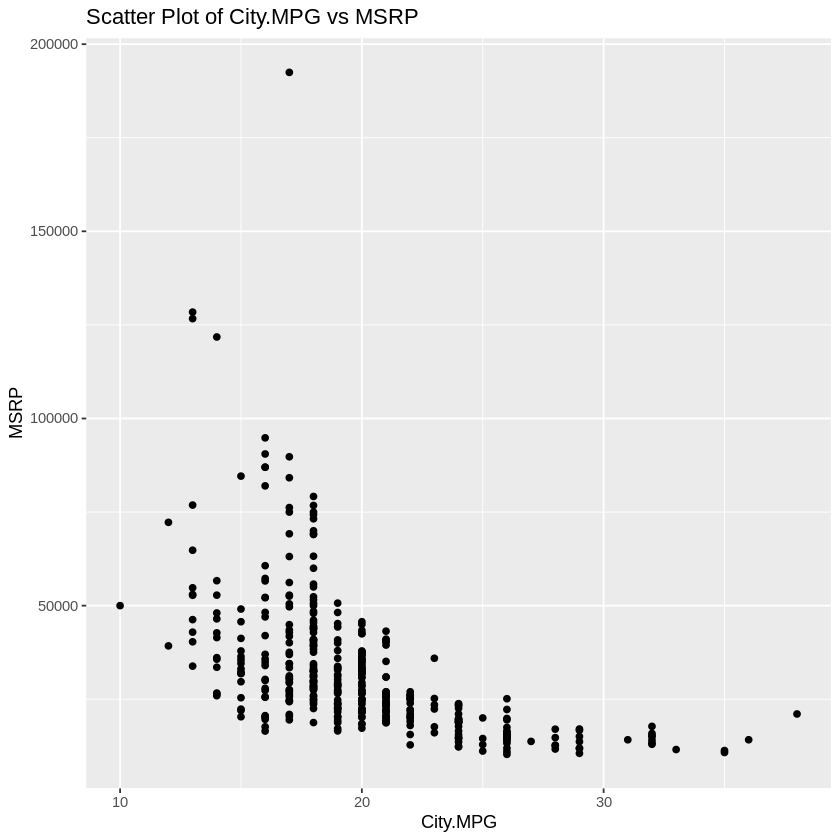


Call:
lm(formula = MSRP ~ City.MPG, data = car_data)

Residuals:
   Min     1Q Median     3Q    Max 
-25651  -9044  -3407   4516 152732 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  80750.8     3895.7   20.73   <2e-16 ***
City.MPG     -2412.8      191.9  -12.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16510 on 405 degrees of freedom
Multiple R-squared:  0.2808,	Adjusted R-squared:  0.2791 
F-statistic: 158.2 on 1 and 405 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(MSRP) ~ City.MPG, data = car_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86286 -0.24590 -0.05287  0.19866  1.67209 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.823262   0.083316  141.91   <2e-16 ***
City.MPG    -0.078099   0.004103  -19.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.353 on 405 degrees of freedom
Multiple R-squared:  0.4722,	Adjusted R-squared:  0.4709 
F-statistic: 362.3 on 1 and 405 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



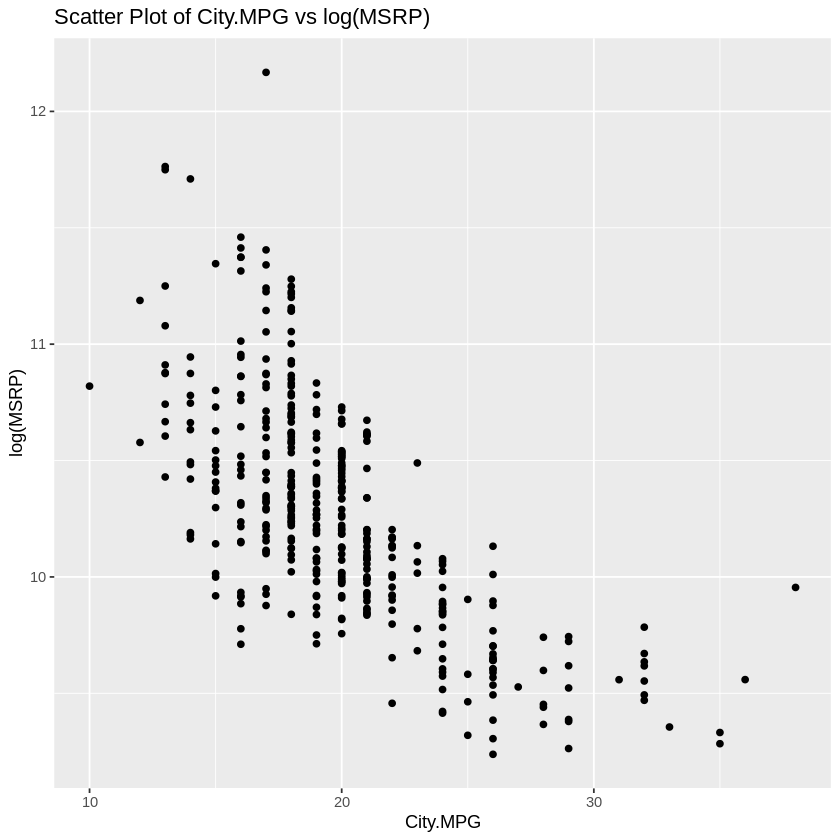

`geom_smooth()` using formula 'y ~ x'



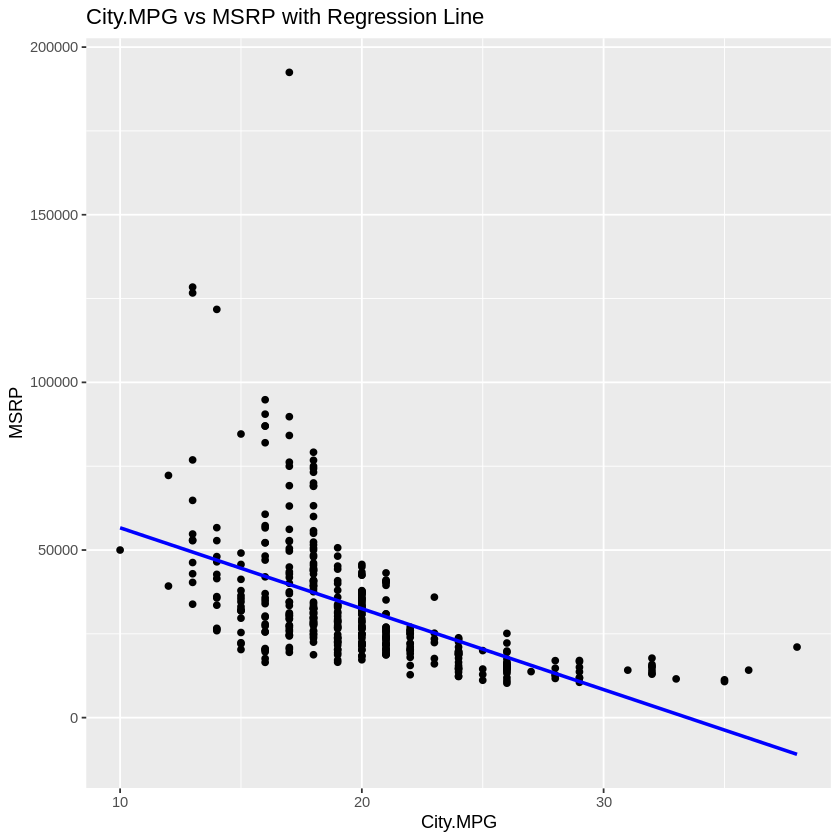

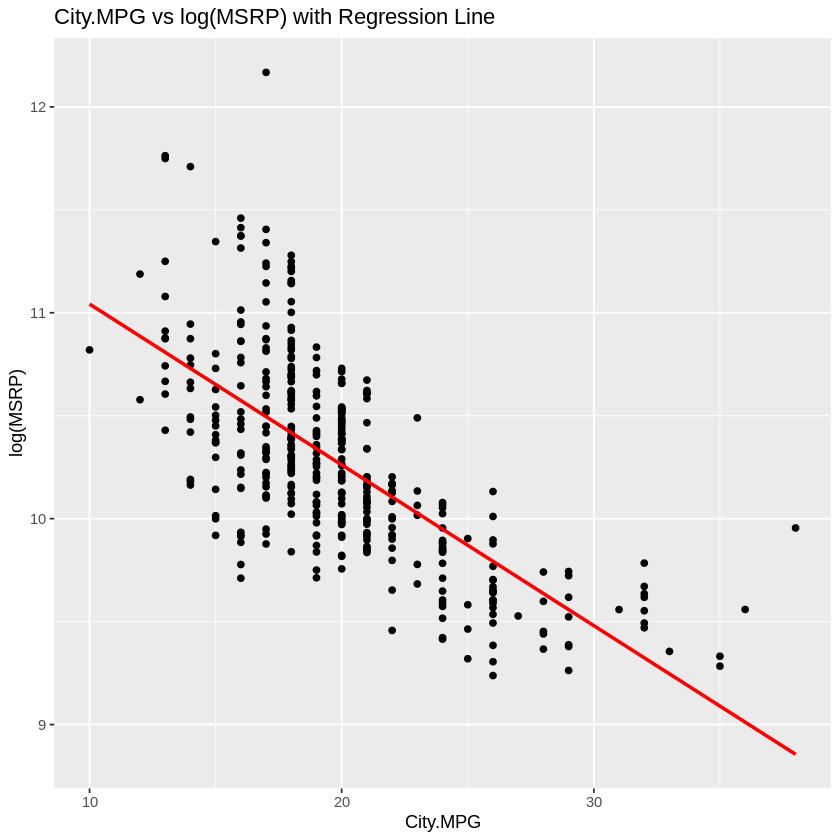

In [12]:
#Put solution to Exercise 3 in this cell. You may add additional cells if you like.

library(ggplot2)


# scatter plot of City.MPG vs MSRP
ggplot(car_data, aes(x = City.MPG, y = MSRP)) +
  geom_point() +
  labs(title = "Scatter Plot of City.MPG vs MSRP", x = "City.MPG", y = "MSRP")

# scatter plot of City.MPG vs log(MSRP)
ggplot(car_data, aes(x = City.MPG, y = log(MSRP))) +
  geom_point() +
  labs(title = "Scatter Plot of City.MPG vs log(MSRP)", x = "City.MPG", y = "log(MSRP)")

# regression model for MSRP ~ City.MPG
model1 <- lm(MSRP ~ City.MPG, data = car_data)
summary(model1)

# regression model for log(MSRP) ~ City.MPG
model2 <- lm(log(MSRP) ~ City.MPG, data = car_data)
summary(model2)

# scatter plot with regression line for City.MPG vs MSRP
ggplot(car_data, aes(x = City.MPG, y = MSRP)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "City.MPG vs MSRP with Regression Line", x = "City.MPG", y = "MSRP")

# scatter plot with regression line: City.MPG vs log(MSRP)
ggplot(car_data, aes(x = City.MPG, y = log(MSRP))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "City.MPG vs log(MSRP) with Regression Line", x = "City.MPG", y = "log(MSRP)")

##### 3a. Compare the fit of the two models. 

Refer to both the plots and the model summary in your answer.
(Type your answer in this cell.)

**The second model (log(MSRP) ~ City.MPG) provides a better fit to data than the first model. It has a higher R-squared (0.4722 v. 0.2808), which means the second model provides a larger proportion of the variability. It has a lower residual standard error (0.353 v. 16,510), which indicates less variability in the residuals. The narrower residual range (-0.86286 to 1.67209) v. -25,651 to 152,732) indicates that the log transform addresses issues like linearity. Finally, looking at the plots, the second model has closer alignment of the regression line and the data points. All of these show that the log transform of MSRP stabilize the variance and thus the model becomes more accurate/reliable.**

##### 4. Create the following boxplots.

* MSRP by body type
* MSRP by wheel drive type

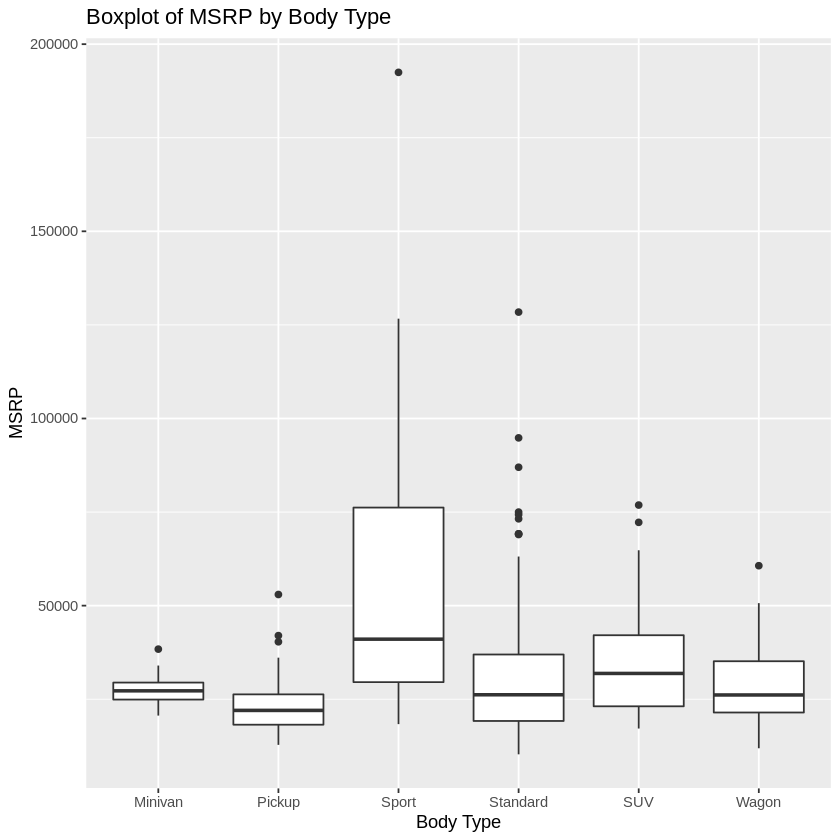

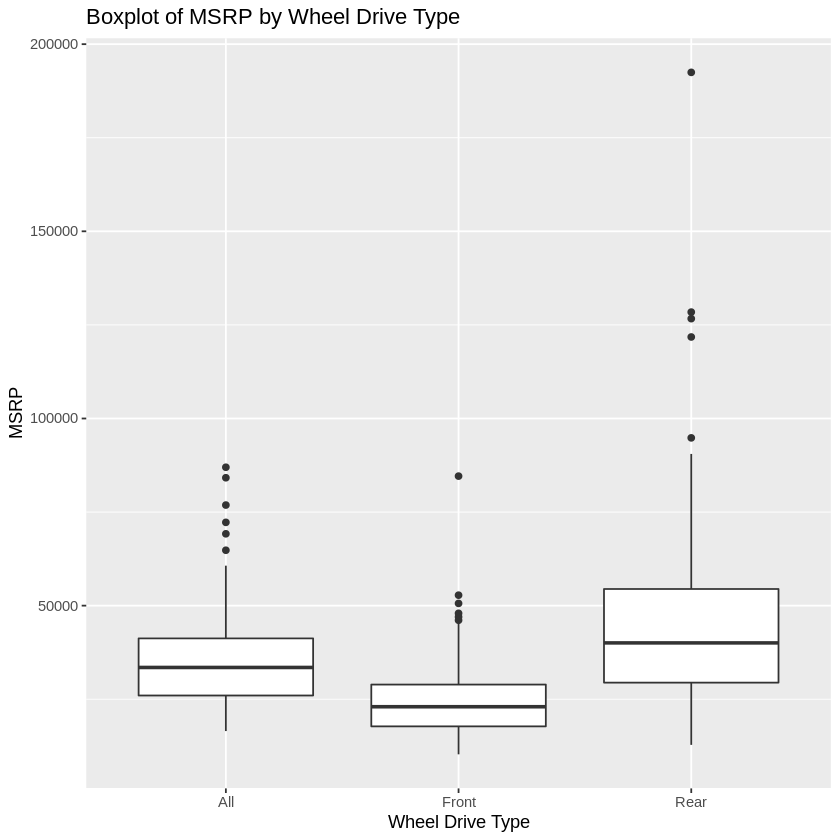

In [13]:
#Put solution to Exercise 4 in this cell. You may add additional cells if you like.

# boxplot MSRP by Body type
ggplot(car_data, aes(x = Body, y = MSRP)) +
  geom_boxplot() +
  labs(title = "Boxplot of MSRP by Body Type",
       x = "Body Type",
       y = "MSRP")

# boxplot MSRP by WheelDrive type
ggplot(car_data, aes(x = WheelDrive, y = MSRP)) +
  geom_boxplot() +
  labs(title = "Boxplot of MSRP by Wheel Drive Type",
       x = "Wheel Drive Type",
       y = "MSRP")


##### 5. Based on your boxplots, select one categorical feature and do the following:

* Create a linear model predicting retail price with your categorical feature as the only predictor.  
* Display the model summary.

In [14]:
#Put solution to Exercise 5 in this cell. You may add additional cells if you like.

# linear model with Body Type as predictor
model_body <- lm(MSRP ~ Body, data = car_data)

summary(model_body)


Call:
lm(formula = MSRP ~ Body, data = car_data)

Residuals:
   Min     1Q Median     3Q    Max 
-36050 -10934  -3025   6899 138070 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     27796       3994   6.959 1.40e-11 ***
BodyPickup      -3046       5461  -0.558    0.577    
BodySport       26598       4800   5.541 5.46e-08 ***
BodyStandard     2088       4164   0.502    0.616    
BodySUV          6880       4622   1.489    0.137    
BodyWagon        1435       5192   0.276    0.782    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17860 on 401 degrees of freedom
Multiple R-squared:  0.1663,	Adjusted R-squared:  0.1559 
F-statistic: 15.99 on 5 and 401 DF,  p-value: 2.222e-14


#### 5a. Interpret the model summary.

Type your answers in this cell.
1. What do the coefficients mean?

**The coefficients in the model represent the estimated change in MSRP for each category of body type compared to the reference category. The intercept is the predicted MSRP for reference category (Minivan in this case). The other coefficients are predicted to be either higher or lower than this reference (which is shown by the coefficient).**

2. Which coefficients are significant, and at what level?

**The BodySport (p=5.46e-08, highly significant at 0.001 level) and intercept (BodyMinivan, p=1.40e-11, highly significant at the 0.001 level) are significant coefficients.**

3. What is the predicted MSRP for each different possible value of the categorical predictor?

**Minivan: $27,796**

**Pickup: $24,750**

**Sport: $54,394**

**Standard: $29,884**

**SUV: $34,676**

**Wagon: $29,231**

##### 6. Use your findings up to this point to create a multiple regression model with the following characteristics.

* Use at least 2 quantitative predictors, but do NOT use **invoice** as a predictor.
* Use one categorical predictor.

Remember to show the model summary.

In [15]:
#Put solution to Exercise 6 in this cell. You may add additional cells if you like.

# multiple regression model
model_multi <- lm(MSRP ~ HP + EngineSize + Body, data = car_data)
summary(model_multi)



Call:
lm(formula = MSRP ~ HP + EngineSize + Body, data = car_data)

Residuals:
   Min     1Q Median     3Q    Max 
-28747  -5265    -31   3784  90966 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -16711.39    3022.03  -5.530  5.8e-08 ***
HP              242.01      13.69  17.675  < 2e-16 ***
EngineSize    -1406.45     919.00  -1.530   0.1267    
BodyPickup    -6539.82    3197.76  -2.045   0.0415 *  
BodySport      7832.75    3034.18   2.582   0.0102 *  
BodyStandard   2003.68    2487.02   0.806   0.4209    
BodySUV          66.41    2707.47   0.025   0.9804    
BodyWagon      2622.57    3086.60   0.850   0.3960    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10420 on 399 degrees of freedom
Multiple R-squared:  0.7176,	Adjusted R-squared:  0.7127 
F-statistic: 144.9 on 7 and 399 DF,  p-value: < 2.2e-16


##### 6a. Interpret the model summary.

Type your answers in this cell.
1. What do the coefficients mean?

**Intercept coefficient represents the MSRP for a vehicle with 0 HP, EngineSize = 0, and Body=Minivan. Intercept not meaningful on its own but serves as baseline. 242.01 for HP intercept indicates that for each additional unit of HP, the MSRP increases by 242.01 dollars on average (holding EngineSize and BodyType constant. The EngineSize intercept of -1.406.45 indicates that for each unit of EngineSize, MSRP decreases by 1,406.45 dollars on average (holding HP and Body constant. Pickup intercept of -6539.82 dollars indicates that MSRP is 6,539.82 dollars less than a minivan (holding HP and EngineSize constant). The same goes for the rest of the BodyType intercepts: Sport cars are 7832.75 dollars higher, Standard cars are 2,003.68 dollars higher, SUVs are 66.41 dollars higher, and wagons are 2,622.57 dollars higher than a Minivan, holding HP and EngineSize constant.**

2. Which coefficients are significant, and at what level?

**HP (p<2e-16, highly significant at 0.001 level), BodyPickup (p=0.0415, significant at 0.05 level), BodySport (p=0.0102, significant at 0.01 level), anf the intercept (p=5.8e-08, highly significant at 0.001 level. Actual practical interpretation is limited, though).**

3. Give a prediction example with the model, using a vehicle with characteristics of your choice.

**Let HP = 200, EngineSize = 3.0 liters, Body = Sport. MSRP = -16,711.39 + (242.01*200) (HP) + (-1,406.45*3.0) (EngineSize) + (7,832.75 * 1) (BodyType) = $35,304.01**

4. What proportion of the variability in MSRP is accounted for by this model?
**Multiple R-Squared = 0.7176, thus 71.76% of the variability in MSRP is accounted for by the predictors in the model.**

##### 7. Create the four standard diagnostic plots for the model you created in Exercise 6.



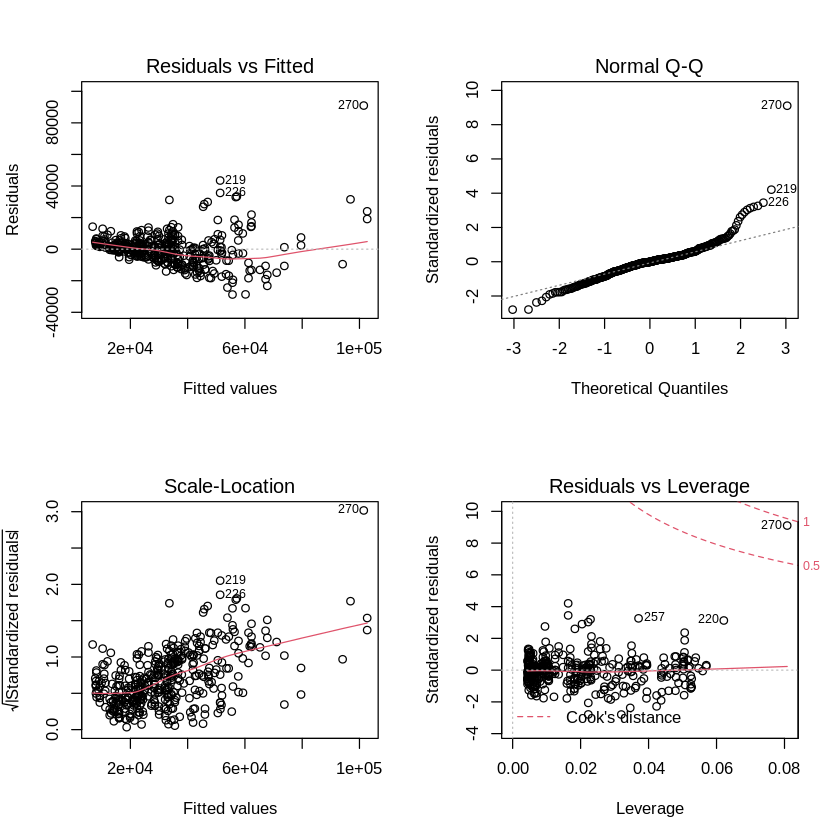

In [17]:
#Put solution to Exercise 7 in this cell. # Create the multiple regression model (as defined in Exercise 6)
par(mfrow = c(2, 2)) 
plot(model_multi)


##### 7a. Interpret your plots.

Identify any concerns.  Do you believe the model meets the necessary conditions for a robust linear model?

**Residuals v. Fitted: non-linear pattern indicates that a linear model may not be the best fit for the data.**

**Normal Q-Q: The tails of the show pretty substantial deviation from the diagional line. This indicates that the residuals are not normally distributed. The outliers/the heavy tails could produce bias results especially in small datasets.**

**Scale-Location: Slight upward trend in the residuals as fitted values increase. Suggests mild heteroscedasticity, indicating model predictions could be inaccurate for higher values of MSRP.**

**Residuals v. Leverage: Few points w/ high leverage and large residuals but nothing exceeding Cook's distance threshold significantly. Pt. 270 stands out but shouldn't dominate model. Could examine this point and remove it if its an outlier to improve model.**

**I don't think the model meets the conditions for a robust linear model. Residuals v. Fitted plot indicates that linear model doesn't fully capture relationship. Using log or quadratic terms could fix this. Normal Q-Q plot shows non-normal residuals (esp. in tails). Transformations or outlier detection/removal could fix this. Scale-Location plot indicates increasing variance in residuals for higher fitted values. Log transform of MSRP could help this.**

##### 8. Add an interaction term to the model you created in Exercise 6.

Show the model summary.

In [18]:
#Put solution to Exercise 8 in this cell. You may add additional cells if you like.
model_interact <- lm(MSRP ~ HP + EngineSize + Body + HP * EngineSize, data = car_data)

summary(model_interact)


Call:
lm(formula = MSRP ~ HP + EngineSize + Body + HP * EngineSize, 
    data = car_data)

Residuals:
   Min     1Q Median     3Q    Max 
-29644  -4417   -600   4038  91864 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6152.173   5733.161   1.073  0.28388    
HP              139.931     25.698   5.445 9.08e-08 ***
EngineSize    -8028.052   1682.740  -4.771 2.58e-06 ***
BodyPickup    -8479.060   3146.001  -2.695  0.00733 ** 
BodySport      5865.451   2988.818   1.962  0.05040 .  
BodyStandard    247.694   2454.393   0.101  0.91967    
BodySUV       -1456.599   2660.378  -0.548  0.58433    
BodyWagon       598.123   3041.160   0.197  0.84418    
HP:EngineSize    29.547      6.355   4.649 4.54e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10160 on 398 degrees of freedom
Multiple R-squared:  0.7322,	Adjusted R-squared:  0.7268 
F-statistic:   136 on 8 and 398 DF,  p-value: < 2.2e-16


##### 8a. Interpret your model.

Type your answers in this cell.

1. Is there a significant interaction?

**There is a significant interaction between HP and EngineSize. THe interaction term has a p-value of 4.54e-06 (highly significant at 0.001 level). This indicates that the effect of HP on MSRP depends on EngineSize.**

2. Which coefficients are significant, and at what level?

**HP (p=9.08e-08, highly significant at 0.001 level), EngineSize (p=2.58e-06, highly significant at 0.001 level), BodyPickup (p-0.00733, significant at 0.01 level), BodySport (p=0.05040, significant at 0.05 level), HP:EngineSize (p=4.54e-06, highly significant at 0.001 level)**

3. Give a prediction example with the model, using a vehicle with characteristics of your choice.

**Gonna use same example as ex. 6 (HP=200, Engine Size=3.0, Body=Sport): MSRP = 6,152.173 + (139.931*200) + (-8,028.052*3.0) + (5,865.451*1) + (29.547*200* 1) = $33,647.87**

4. What proportion of the variability in MSRP is accounted for by this model?

**Multiple R-squared: 0.7322. Thus, 73.22 of the variability in MSRP is accounted for by the predictors of the model.**